In [1]:
%matplotlib inline
import tensorflow as tf
import math
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import *
from tensorflow.keras.utils import *
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [3]:
epoch = 1000
batch_size = 128
initializer = initializers.he_normal(seed=114)

In [4]:
def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.9
    epochs_drop = 10
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

In [5]:
lrate = callbacks.LearningRateScheduler(step_decay)

In [6]:
def basic_layer(node, dropoutrate = 0):
    layer = models.Sequential()
    layer.add(layers.Dense(node, kernel_initializer=initializer))
    if(dropoutrate>0):
        layer.add(layers.Dropout(dropoutrate))
    layer.add(layers.BatchNormalization())
    layer.add(layers.Activation('elu'))
    return layer

In [7]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))
model.add(basic_layer(128, 0.125))
model.add(basic_layer(128, 0.125))
model.add(basic_layer(256, 0.25))
model.add(basic_layer(256, 0.25))
model.add(basic_layer(512, 0.5))
model.add(basic_layer(512, 0.5))
model.add(basic_layer(256))
model.add(basic_layer(128))
model.add(basic_layer(64))
model.add(layers.Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 128)               100992    
_________________________________________________________________
sequential_2 (Sequential)    (None, 128)               17024     
_________________________________________________________________
sequential_3 (Sequential)    (None, 256)               34048     
_________________________________________________________________
sequential_4 (Sequential)    (None, 256)               66816     
_________________________________________________________________
sequential_5 (Sequential)    (None, 512)               133632    
_________________________________________________________________
sequential_6 (Sequential)    (None, 512)               2

In [9]:
sgd = optimizers.SGD()
model.compile(optimizer= sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
aug = preprocessing.image.ImageDataGenerator(width_shift_range=0.1,
                                             height_shift_range=0.1,
                                             horizontal_flip=True)
batches = aug.flow(x_train, y_train, batch_size=batch_size)
val_batches = aug.flow(x_test, y_test, batch_size=batch_size)
history = model.fit_generator(batches, 
                               epochs=epoch,
                               validation_data=val_batches, 
                               callbacks=[lrate])

Epoch 1/1000
469/469 [==============================] - 47s 100ms/step - loss: 1.0341 - accuracy: 0.6141 - val_loss: 0.7828 - val_accuracy: 0.7244
Epoch 2/1000
469/469 [==============================] - 48s 102ms/step - loss: 0.8023 - accuracy: 0.7021 - val_loss: 0.7112 - val_accuracy: 0.7458
Epoch 3/1000
469/469 [==============================] - 48s 103ms/step - loss: 0.7507 - accuracy: 0.7198 - val_loss: 0.6975 - val_accuracy: 0.7468
Epoch 4/1000
469/469 [==============================] - 48s 102ms/step - loss: 0.7172 - accuracy: 0.7330 - val_loss: 0.6513 - val_accuracy: 0.7575
Epoch 5/1000
469/469 [==============================] - 48s 103ms/step - loss: 0.6946 - accuracy: 0.7424 - val_loss: 0.6371 - val_accuracy: 0.7633
Epoch 6/1000
469/469 [==============================] - 48s 103ms/step - loss: 0.6820 - accuracy: 0.7481 - val_loss: 0.6101 - val_accuracy: 0.7761
Epoch 7/1000
469/469 [==============================] - 45s 97ms/step - loss: 0.6721 - accuracy: 0.7497 - val_loss: 0.

469/469 [==============================] - 46s 99ms/step - loss: 0.4943 - accuracy: 0.8161 - val_loss: 0.4682 - val_accuracy: 0.8296
Epoch 57/1000
469/469 [==============================] - 46s 97ms/step - loss: 0.4922 - accuracy: 0.8202 - val_loss: 0.4508 - val_accuracy: 0.8354
Epoch 58/1000
469/469 [==============================] - 45s 96ms/step - loss: 0.4906 - accuracy: 0.8199 - val_loss: 0.4623 - val_accuracy: 0.8336
Epoch 59/1000
469/469 [==============================] - 45s 97ms/step - loss: 0.4853 - accuracy: 0.8208 - val_loss: 0.5029 - val_accuracy: 0.8136
Epoch 60/1000
469/469 [==============================] - 46s 97ms/step - loss: 0.4864 - accuracy: 0.8184 - val_loss: 0.4579 - val_accuracy: 0.8342
Epoch 61/1000
469/469 [==============================] - 45s 97ms/step - loss: 0.4895 - accuracy: 0.8183 - val_loss: 0.4642 - val_accuracy: 0.8273
Epoch 62/1000
469/469 [==============================] - 46s 99ms/step - loss: 0.4849 - accuracy: 0.8206 - val_loss: 0.4644 - val_ac

Epoch 112/1000
469/469 [==============================] - 44s 94ms/step - loss: 0.4549 - accuracy: 0.8325 - val_loss: 0.4366 - val_accuracy: 0.8448
Epoch 113/1000
469/469 [==============================] - 45s 96ms/step - loss: 0.4532 - accuracy: 0.8333 - val_loss: 0.4365 - val_accuracy: 0.8407
Epoch 114/1000
469/469 [==============================] - 45s 96ms/step - loss: 0.4506 - accuracy: 0.8347 - val_loss: 0.4345 - val_accuracy: 0.8421
Epoch 115/1000
469/469 [==============================] - 45s 96ms/step - loss: 0.4557 - accuracy: 0.8318 - val_loss: 0.4366 - val_accuracy: 0.8462
Epoch 116/1000
469/469 [==============================] - 46s 98ms/step - loss: 0.4566 - accuracy: 0.8321 - val_loss: 0.4372 - val_accuracy: 0.8440
Epoch 117/1000
469/469 [==============================] - 48s 102ms/step - loss: 0.4568 - accuracy: 0.8316 - val_loss: 0.4373 - val_accuracy: 0.8431
Epoch 118/1000
469/469 [==============================] - 46s 99ms/step - loss: 0.4498 - accuracy: 0.8341 - val

469/469 [==============================] - 45s 95ms/step - loss: 0.4370 - accuracy: 0.8397 - val_loss: 0.4284 - val_accuracy: 0.8464
Epoch 168/1000
469/469 [==============================] - 45s 97ms/step - loss: 0.4364 - accuracy: 0.8390 - val_loss: 0.4272 - val_accuracy: 0.8470
Epoch 169/1000
469/469 [==============================] - 46s 99ms/step - loss: 0.4393 - accuracy: 0.8396 - val_loss: 0.4193 - val_accuracy: 0.8492
Epoch 170/1000
469/469 [==============================] - 45s 96ms/step - loss: 0.4378 - accuracy: 0.8381 - val_loss: 0.4206 - val_accuracy: 0.8469
Epoch 171/1000
469/469 [==============================] - 48s 101ms/step - loss: 0.4347 - accuracy: 0.8408 - val_loss: 0.4296 - val_accuracy: 0.8446
Epoch 172/1000
469/469 [==============================] - 50s 107ms/step - loss: 0.4352 - accuracy: 0.8384 - val_loss: 0.4170 - val_accuracy: 0.8522
Epoch 173/1000
469/469 [==============================] - 51s 108ms/step - loss: 0.4357 - accuracy: 0.8393 - val_loss: 0.4226

469/469 [==============================] - 45s 96ms/step - loss: 0.4302 - accuracy: 0.8410 - val_loss: 0.4043 - val_accuracy: 0.8566
Epoch 223/1000
469/469 [==============================] - 45s 95ms/step - loss: 0.4304 - accuracy: 0.8411 - val_loss: 0.4103 - val_accuracy: 0.8517
Epoch 224/1000
469/469 [==============================] - 45s 97ms/step - loss: 0.4336 - accuracy: 0.8392 - val_loss: 0.4126 - val_accuracy: 0.8517
Epoch 225/1000
469/469 [==============================] - 45s 95ms/step - loss: 0.4318 - accuracy: 0.8399 - val_loss: 0.4108 - val_accuracy: 0.8531
Epoch 226/1000
469/469 [==============================] - 45s 96ms/step - loss: 0.4315 - accuracy: 0.8411 - val_loss: 0.4095 - val_accuracy: 0.8516
Epoch 227/1000
469/469 [==============================] - 47s 99ms/step - loss: 0.4322 - accuracy: 0.8410 - val_loss: 0.4082 - val_accuracy: 0.8517
Epoch 228/1000
469/469 [==============================] - 49s 105ms/step - loss: 0.4310 - accuracy: 0.8412 - val_loss: 0.4057 -

469/469 [==============================] - 47s 99ms/step - loss: 0.4243 - accuracy: 0.8438 - val_loss: 0.4113 - val_accuracy: 0.8471
Epoch 278/1000
469/469 [==============================] - 47s 100ms/step - loss: 0.4256 - accuracy: 0.8428 - val_loss: 0.4117 - val_accuracy: 0.8533
Epoch 279/1000
469/469 [==============================] - 46s 97ms/step - loss: 0.4236 - accuracy: 0.8440 - val_loss: 0.4048 - val_accuracy: 0.8544
Epoch 280/1000
469/469 [==============================] - 47s 99ms/step - loss: 0.4254 - accuracy: 0.8430 - val_loss: 0.4020 - val_accuracy: 0.8534
Epoch 281/1000
469/469 [==============================] - 49s 104ms/step - loss: 0.4232 - accuracy: 0.8435 - val_loss: 0.4027 - val_accuracy: 0.8508
Epoch 282/1000
469/469 [==============================] - 47s 100ms/step - loss: 0.4217 - accuracy: 0.8450 - val_loss: 0.4042 - val_accuracy: 0.8542
Epoch 283/1000
469/469 [==============================] - 47s 99ms/step - loss: 0.4273 - accuracy: 0.8426 - val_loss: 0.4080

469/469 [==============================] - 45s 97ms/step - loss: 0.4255 - accuracy: 0.8430 - val_loss: 0.4171 - val_accuracy: 0.8544
Epoch 333/1000
469/469 [==============================] - 45s 96ms/step - loss: 0.4268 - accuracy: 0.8430 - val_loss: 0.4113 - val_accuracy: 0.8530
Epoch 334/1000
469/469 [==============================] - 45s 96ms/step - loss: 0.4212 - accuracy: 0.8438 - val_loss: 0.4180 - val_accuracy: 0.8552
Epoch 335/1000
469/469 [==============================] - 47s 101ms/step - loss: 0.4207 - accuracy: 0.8457 - val_loss: 0.4123 - val_accuracy: 0.8536
Epoch 336/1000
469/469 [==============================] - 45s 96ms/step - loss: 0.4215 - accuracy: 0.8446 - val_loss: 0.4120 - val_accuracy: 0.8530
Epoch 337/1000
469/469 [==============================] - 45s 95ms/step - loss: 0.4258 - accuracy: 0.8407 - val_loss: 0.4143 - val_accuracy: 0.8528
Epoch 338/1000
469/469 [==============================] - 45s 97ms/step - loss: 0.4239 - accuracy: 0.8435 - val_loss: 0.4098 -

469/469 [==============================] - 43s 91ms/step - loss: 0.4223 - accuracy: 0.8440 - val_loss: 0.4097 - val_accuracy: 0.8575
Epoch 388/1000
469/469 [==============================] - 44s 93ms/step - loss: 0.4248 - accuracy: 0.8430 - val_loss: 0.4103 - val_accuracy: 0.8550
Epoch 389/1000
469/469 [==============================] - 43s 91ms/step - loss: 0.4233 - accuracy: 0.8442 - val_loss: 0.4100 - val_accuracy: 0.8531
Epoch 390/1000
469/469 [==============================] - 43s 92ms/step - loss: 0.4190 - accuracy: 0.8442 - val_loss: 0.4042 - val_accuracy: 0.8507
Epoch 391/1000
469/469 [==============================] - 43s 91ms/step - loss: 0.4275 - accuracy: 0.8414 - val_loss: 0.4063 - val_accuracy: 0.8546
Epoch 392/1000
469/469 [==============================] - 43s 92ms/step - loss: 0.4208 - accuracy: 0.8440 - val_loss: 0.4038 - val_accuracy: 0.8561
Epoch 393/1000
469/469 [==============================] - 43s 91ms/step - loss: 0.4184 - accuracy: 0.8459 - val_loss: 0.4046 - 

469/469 [==============================] - 43s 92ms/step - loss: 0.4227 - accuracy: 0.8449 - val_loss: 0.4128 - val_accuracy: 0.8544
Epoch 443/1000
469/469 [==============================] - 43s 91ms/step - loss: 0.4195 - accuracy: 0.8449 - val_loss: 0.4084 - val_accuracy: 0.8550
Epoch 444/1000
469/469 [==============================] - 43s 92ms/step - loss: 0.4184 - accuracy: 0.8442 - val_loss: 0.4134 - val_accuracy: 0.8515
Epoch 445/1000
469/469 [==============================] - 43s 92ms/step - loss: 0.4204 - accuracy: 0.8450 - val_loss: 0.4135 - val_accuracy: 0.8548
Epoch 446/1000
469/469 [==============================] - 43s 92ms/step - loss: 0.4171 - accuracy: 0.8466 - val_loss: 0.4114 - val_accuracy: 0.8546
Epoch 447/1000
469/469 [==============================] - 42s 90ms/step - loss: 0.4217 - accuracy: 0.8436 - val_loss: 0.4047 - val_accuracy: 0.8550
Epoch 448/1000
469/469 [==============================] - 43s 92ms/step - loss: 0.4241 - accuracy: 0.8439 - val_loss: 0.4061 - 

469/469 [==============================] - 43s 92ms/step - loss: 0.4194 - accuracy: 0.8442 - val_loss: 0.4007 - val_accuracy: 0.8526
Epoch 498/1000
469/469 [==============================] - 44s 93ms/step - loss: 0.4223 - accuracy: 0.8449 - val_loss: 0.4067 - val_accuracy: 0.8546
Epoch 499/1000
469/469 [==============================] - 43s 92ms/step - loss: 0.4175 - accuracy: 0.8451 - val_loss: 0.3941 - val_accuracy: 0.8578
Epoch 500/1000
469/469 [==============================] - 44s 94ms/step - loss: 0.4187 - accuracy: 0.8453 - val_loss: 0.4085 - val_accuracy: 0.8562
Epoch 501/1000
469/469 [==============================] - 44s 93ms/step - loss: 0.4180 - accuracy: 0.8449 - val_loss: 0.4055 - val_accuracy: 0.8559
Epoch 502/1000
469/469 [==============================] - 44s 94ms/step - loss: 0.4240 - accuracy: 0.8436 - val_loss: 0.4032 - val_accuracy: 0.8558
Epoch 503/1000
469/469 [==============================] - 44s 93ms/step - loss: 0.4212 - accuracy: 0.8446 - val_loss: 0.3972 - 

469/469 [==============================] - 44s 93ms/step - loss: 0.4250 - accuracy: 0.8430 - val_loss: 0.4025 - val_accuracy: 0.8565
Epoch 553/1000
469/469 [==============================] - 47s 99ms/step - loss: 0.4202 - accuracy: 0.8456 - val_loss: 0.3972 - val_accuracy: 0.8565
Epoch 554/1000
469/469 [==============================] - 48s 103ms/step - loss: 0.4207 - accuracy: 0.8446 - val_loss: 0.4050 - val_accuracy: 0.8530
Epoch 555/1000
469/469 [==============================] - 47s 101ms/step - loss: 0.4185 - accuracy: 0.8446 - val_loss: 0.4039 - val_accuracy: 0.8545
Epoch 556/1000
469/469 [==============================] - 49s 104ms/step - loss: 0.4233 - accuracy: 0.8433 - val_loss: 0.4047 - val_accuracy: 0.8541
Epoch 557/1000
469/469 [==============================] - 48s 103ms/step - loss: 0.4158 - accuracy: 0.8464 - val_loss: 0.4096 - val_accuracy: 0.8553
Epoch 558/1000
469/469 [==============================] - 48s 103ms/step - loss: 0.4212 - accuracy: 0.8439 - val_loss: 0.39

469/469 [==============================] - 48s 102ms/step - loss: 0.4184 - accuracy: 0.8449 - val_loss: 0.4064 - val_accuracy: 0.8517
Epoch 608/1000
469/469 [==============================] - 49s 104ms/step - loss: 0.4190 - accuracy: 0.8443 - val_loss: 0.4061 - val_accuracy: 0.8531
Epoch 609/1000
469/469 [==============================] - 48s 103ms/step - loss: 0.4181 - accuracy: 0.8455 - val_loss: 0.4019 - val_accuracy: 0.8542
Epoch 610/1000
469/469 [==============================] - 48s 103ms/step - loss: 0.4197 - accuracy: 0.8451 - val_loss: 0.4028 - val_accuracy: 0.8533
Epoch 611/1000
469/469 [==============================] - 48s 103ms/step - loss: 0.4212 - accuracy: 0.8435 - val_loss: 0.3981 - val_accuracy: 0.8557
Epoch 612/1000
469/469 [==============================] - 49s 104ms/step - loss: 0.4210 - accuracy: 0.8451 - val_loss: 0.3967 - val_accuracy: 0.8569
Epoch 613/1000
469/469 [==============================] - 49s 104ms/step - loss: 0.4209 - accuracy: 0.8437 - val_loss: 0.

469/469 [==============================] - 44s 93ms/step - loss: 0.4208 - accuracy: 0.8448 - val_loss: 0.3993 - val_accuracy: 0.8557
Epoch 663/1000
469/469 [==============================] - 44s 93ms/step - loss: 0.4184 - accuracy: 0.8453 - val_loss: 0.3975 - val_accuracy: 0.8536
Epoch 664/1000
469/469 [==============================] - 44s 93ms/step - loss: 0.4200 - accuracy: 0.8455 - val_loss: 0.3996 - val_accuracy: 0.8558
Epoch 665/1000
469/469 [==============================] - 43s 92ms/step - loss: 0.4195 - accuracy: 0.8444 - val_loss: 0.3974 - val_accuracy: 0.8563
Epoch 666/1000
469/469 [==============================] - 44s 93ms/step - loss: 0.4205 - accuracy: 0.8448 - val_loss: 0.4003 - val_accuracy: 0.8557
Epoch 667/1000
469/469 [==============================] - 43s 92ms/step - loss: 0.4233 - accuracy: 0.8438 - val_loss: 0.3988 - val_accuracy: 0.8572
Epoch 668/1000
469/469 [==============================] - 44s 93ms/step - loss: 0.4213 - accuracy: 0.8446 - val_loss: 0.4054 - 

469/469 [==============================] - 43s 91ms/step - loss: 0.4197 - accuracy: 0.8443 - val_loss: 0.4026 - val_accuracy: 0.8543
Epoch 718/1000
469/469 [==============================] - 43s 91ms/step - loss: 0.4219 - accuracy: 0.8439 - val_loss: 0.3964 - val_accuracy: 0.8532
Epoch 719/1000
469/469 [==============================] - 43s 91ms/step - loss: 0.4219 - accuracy: 0.8446 - val_loss: 0.3919 - val_accuracy: 0.8592
Epoch 720/1000
469/469 [==============================] - 43s 91ms/step - loss: 0.4215 - accuracy: 0.8438 - val_loss: 0.4029 - val_accuracy: 0.8548
Epoch 721/1000
469/469 [==============================] - 43s 91ms/step - loss: 0.4224 - accuracy: 0.8443 - val_loss: 0.4058 - val_accuracy: 0.8553
Epoch 722/1000
469/469 [==============================] - 43s 92ms/step - loss: 0.4235 - accuracy: 0.8444 - val_loss: 0.4034 - val_accuracy: 0.8552
Epoch 723/1000
469/469 [==============================] - 43s 92ms/step - loss: 0.4218 - accuracy: 0.8452 - val_loss: 0.4017 - 

469/469 [==============================] - 44s 93ms/step - loss: 0.4209 - accuracy: 0.8435 - val_loss: 0.3968 - val_accuracy: 0.8549
Epoch 773/1000
469/469 [==============================] - 42s 90ms/step - loss: 0.4167 - accuracy: 0.8465 - val_loss: 0.3945 - val_accuracy: 0.8544
Epoch 774/1000
469/469 [==============================] - 43s 91ms/step - loss: 0.4199 - accuracy: 0.8457 - val_loss: 0.3925 - val_accuracy: 0.8547
Epoch 775/1000
469/469 [==============================] - 43s 91ms/step - loss: 0.4214 - accuracy: 0.8452 - val_loss: 0.4011 - val_accuracy: 0.8529
Epoch 776/1000
469/469 [==============================] - 43s 91ms/step - loss: 0.4193 - accuracy: 0.8454 - val_loss: 0.4010 - val_accuracy: 0.8547
Epoch 777/1000
469/469 [==============================] - 43s 91ms/step - loss: 0.4183 - accuracy: 0.8452 - val_loss: 0.3995 - val_accuracy: 0.8558
Epoch 778/1000
469/469 [==============================] - 43s 91ms/step - loss: 0.4191 - accuracy: 0.8444 - val_loss: 0.3938 - 

469/469 [==============================] - 43s 92ms/step - loss: 0.4221 - accuracy: 0.8440 - val_loss: 0.4030 - val_accuracy: 0.8546
Epoch 828/1000
469/469 [==============================] - 43s 91ms/step - loss: 0.4215 - accuracy: 0.8429 - val_loss: 0.4110 - val_accuracy: 0.8520
Epoch 829/1000
469/469 [==============================] - 43s 92ms/step - loss: 0.4191 - accuracy: 0.8457 - val_loss: 0.4072 - val_accuracy: 0.8534
Epoch 830/1000
469/469 [==============================] - 43s 91ms/step - loss: 0.4189 - accuracy: 0.8452 - val_loss: 0.4013 - val_accuracy: 0.8564
Epoch 831/1000
469/469 [==============================] - 43s 92ms/step - loss: 0.4201 - accuracy: 0.8452 - val_loss: 0.4038 - val_accuracy: 0.8542
Epoch 832/1000
469/469 [==============================] - 43s 92ms/step - loss: 0.4199 - accuracy: 0.8461 - val_loss: 0.4030 - val_accuracy: 0.8574
Epoch 833/1000
469/469 [==============================] - 44s 93ms/step - loss: 0.4178 - accuracy: 0.8447 - val_loss: 0.4040 - 

469/469 [==============================] - 43s 91ms/step - loss: 0.4188 - accuracy: 0.8462 - val_loss: 0.4038 - val_accuracy: 0.8555
Epoch 883/1000
469/469 [==============================] - 44s 93ms/step - loss: 0.4205 - accuracy: 0.8441 - val_loss: 0.4059 - val_accuracy: 0.8543
Epoch 884/1000
469/469 [==============================] - 43s 92ms/step - loss: 0.4192 - accuracy: 0.8455 - val_loss: 0.4051 - val_accuracy: 0.8559
Epoch 885/1000
469/469 [==============================] - 43s 92ms/step - loss: 0.4199 - accuracy: 0.8446 - val_loss: 0.4068 - val_accuracy: 0.8543
Epoch 886/1000
469/469 [==============================] - 43s 91ms/step - loss: 0.4179 - accuracy: 0.8448 - val_loss: 0.4022 - val_accuracy: 0.8556
Epoch 887/1000
469/469 [==============================] - 43s 92ms/step - loss: 0.4205 - accuracy: 0.8440 - val_loss: 0.3980 - val_accuracy: 0.8569
Epoch 888/1000
469/469 [==============================] - 43s 91ms/step - loss: 0.4212 - accuracy: 0.8438 - val_loss: 0.4087 - 

469/469 [==============================] - 49s 105ms/step - loss: 0.4169 - accuracy: 0.8458 - val_loss: 0.4016 - val_accuracy: 0.8524
Epoch 938/1000
469/469 [==============================] - 50s 106ms/step - loss: 0.4171 - accuracy: 0.8452 - val_loss: 0.4026 - val_accuracy: 0.8549
Epoch 939/1000
469/469 [==============================] - 47s 100ms/step - loss: 0.4206 - accuracy: 0.8455 - val_loss: 0.4028 - val_accuracy: 0.8572
Epoch 940/1000
469/469 [==============================] - 47s 100ms/step - loss: 0.4187 - accuracy: 0.8455 - val_loss: 0.4066 - val_accuracy: 0.8552
Epoch 941/1000
469/469 [==============================] - 47s 100ms/step - loss: 0.4184 - accuracy: 0.8444 - val_loss: 0.4035 - val_accuracy: 0.8550
Epoch 942/1000
469/469 [==============================] - 49s 106ms/step - loss: 0.4224 - accuracy: 0.8434 - val_loss: 0.4050 - val_accuracy: 0.8569
Epoch 943/1000
469/469 [==============================] - 46s 98ms/step - loss: 0.4187 - accuracy: 0.8453 - val_loss: 0.3

469/469 [==============================] - 46s 98ms/step - loss: 0.4212 - accuracy: 0.8440 - val_loss: 0.4027 - val_accuracy: 0.8543
Epoch 992/1000
469/469 [==============================] - 45s 96ms/step - loss: 0.4174 - accuracy: 0.8468 - val_loss: 0.4043 - val_accuracy: 0.8557
Epoch 993/1000
469/469 [==============================] - 45s 96ms/step - loss: 0.4187 - accuracy: 0.8447 - val_loss: 0.3924 - val_accuracy: 0.8610
Epoch 994/1000
469/469 [==============================] - 45s 96ms/step - loss: 0.4184 - accuracy: 0.8458 - val_loss: 0.4100 - val_accuracy: 0.8553
Epoch 995/1000
469/469 [==============================] - 45s 97ms/step - loss: 0.4156 - accuracy: 0.8453 - val_loss: 0.4082 - val_accuracy: 0.8501
Epoch 996/1000
469/469 [==============================] - 45s 96ms/step - loss: 0.4175 - accuracy: 0.8453 - val_loss: 0.3984 - val_accuracy: 0.8549
Epoch 997/1000
469/469 [==============================] - 46s 97ms/step - loss: 0.4184 - accuracy: 0.8448 - val_loss: 0.4082 - 

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

10000/1 - 1s - loss: 0.3232 - accuracy: 0.8699


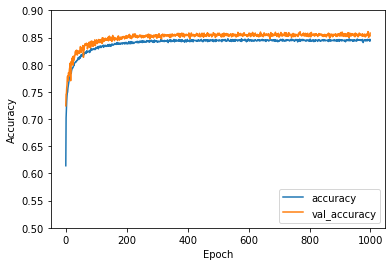

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 0.9])
plt.legend(loc='lower right')
# plt.savefig("ann_acc.png", dpi=500)

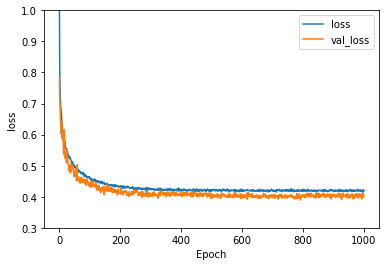

In [15]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0.3, 1])
plt.legend(loc='upper right')
# plt.savefig("ann_loss.png", dpi=500)

In [16]:
model.save('C:/Users/Suisei_Saika/DNN_DataAugmentation_SGD.h5')